In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style("whitegrid")

In [6]:
df=pd.read_csv("/Users/gautam/Desktop/Erdos project repo/fall-2025-forecasting-electricity-price/src/data/datasets/nat_gas_futures.csv")

In [49]:
df.head(15)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
1204,2001-01-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,7.825,$/MMBTU
757,2001-02-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,5.610,$/MMBTU
495,2001-03-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE4,Future Contract 4,RNGC4,Natural Gas Futures Contract 4 (Dollars per Mi...,5.327,$/MMBTU
1300,2001-04-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE4,Future Contract 4,RNGC4,Natural Gas Futures Contract 4 (Dollars per Mi...,5.332,$/MMBTU
162,2001-05-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,4.190,$/MMBTU
592,2001-06-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,3.782,$/MMBTU
29,2001-07-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE2,Future Contract 2,RNGC2,Natural Gas Futures Contract 2 (Dollars per Mi...,3.223,$/MMBTU
593,2001-08-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,2.935,$/MMBTU
665,2001-09-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE3,Future Contract 3,RNGC3,Natural Gas Futures Contract 3 (Dollars per Mi...,2.891,$/MMBTU
1483,2001-10-01,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE3,Future Contract 3,RNGC3,Natural Gas Futures Contract 3 (Dollars per Mi...,3.065,$/MMBTU


In [22]:
# Parse period and coerce value to float
df["period"] = pd.to_datetime(df["period"], format="%Y-%m")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

In [39]:
# Keep one row per month (if duplicates exist, keep the latest)
df = (df.sort_values(["period"]).drop_duplicates(subset=["period"], keep="last"))

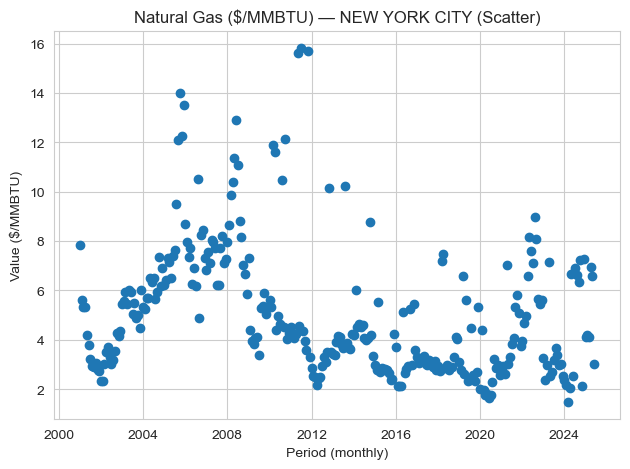

In [40]:

# Sort by time and keep one point per month if dupes
df = (df.sort_values("period")
          .drop_duplicates(subset=["period"], keep="last"))

# scatterplot
plt.figure()
plt.plot(df["period"], df["value"], linestyle="", marker="o")
plt.title("Natural Gas ($/MMBTU) — NEW YORK CITY (Scatter)")
plt.xlabel("Period (monthly)")
plt.ylabel("Value ($/MMBTU)")
plt.tight_layout()
plt.show()

In [37]:
# Set monthly DatetimeIndex and reindex to continuous monthly frequency
ts = (df.set_index("period")["value"].asfreq("MS")) 
print(ts.describe())
print("Missing months:", ts.isna().sum())

count    294.000000
mean       5.047408
std        2.646624
min        1.490000
25%        3.010750
50%        4.235000
75%        6.464750
max       15.800000
Name: value, dtype: float64
Missing months: 0


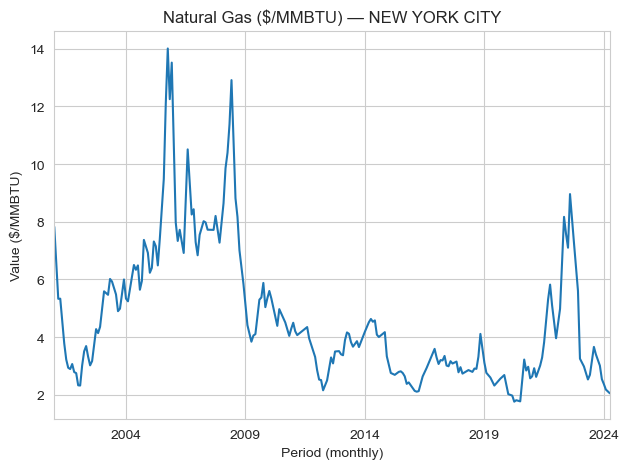

In [38]:
plt.figure()
ts_filled.plot()
plt.title("Natural Gas ($/MMBTU) — NEW YORK CITY")
plt.xlabel("Period (monthly)")
plt.ylabel("Value ($/MMBTU)")
plt.tight_layout()
plt.show()

Seems like there are some spikes around 2006, 2008 and 2022

In [41]:
coal_import=pd.read_csv("/Users/gautam/Desktop/Erdos project repo/fall-2025-forecasting-electricity-price/src/data/datasets/quarterly_coal_import_price.csv")

In [44]:
# Basic cleaning
coal_import.columns = [c.strip() for c in coal_import.columns]
coal_import["price"] = pd.to_numeric(coal_import["price"], errors="coerce")

In [46]:
coal_import.head(10)

,period,exportImportType,coalRankId,coalRankDescription,price,price-units
0,2008-Q1,Exports,MET,Metallurgical,98.90,dollars per short ton
1,2010-Q3,Imports,MET,Metallurgical,204.71,dollars per short ton
2,2004-Q2,Exports,MET,Metallurgical,65.32,dollars per short ton
3,2004-Q1,Exports,MET,Metallurgical,54.10,dollars per short ton
4,2004-Q1,Imports,MET,Metallurgical,48.42,dollars per short ton
5,2006-Q4,Imports,MET,Metallurgical,113.25,dollars per short ton
6,2001-Q3,Imports,MET,Metallurgical,44.92,dollars per short ton
7,2010-Q4,Exports,MET,Metallurgical,160.63,dollars per short ton
8,2004-Q2,Imports,MET,Metallurgical,50.74,dollars per short ton
9,2010-Q4,Imports,MET,Metallurgical,194.73,dollars per short ton


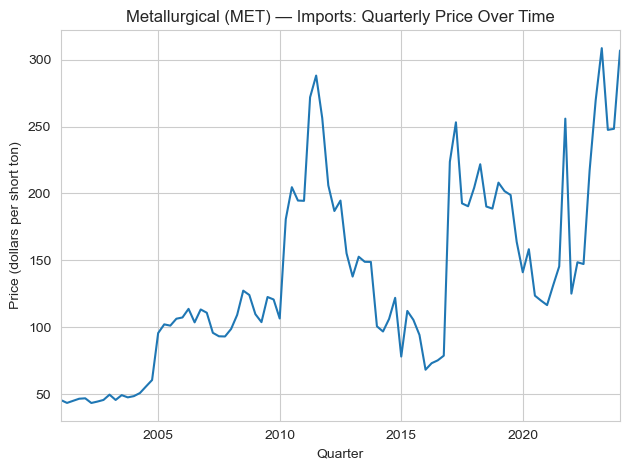

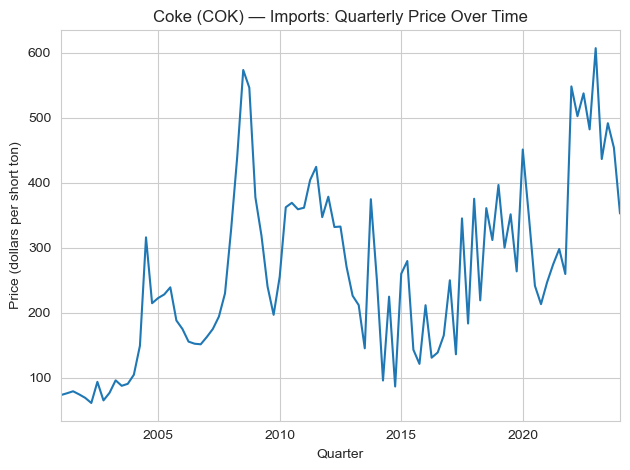

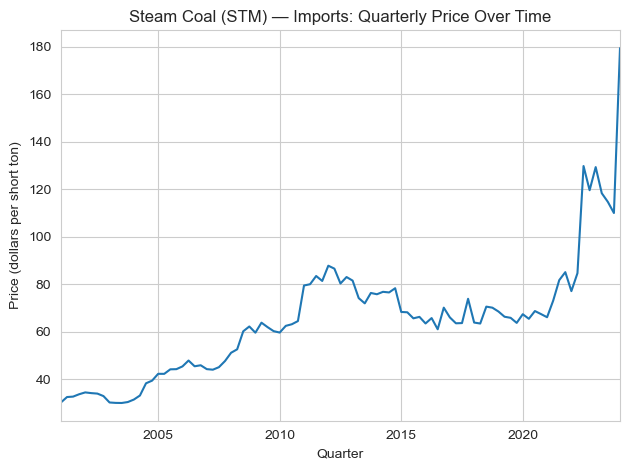

In [48]:
def parse_quarter(s: str) -> pd.Timestamp:
    s = str(s).strip()
    year, q = s.split("-Q")
    year = int(year)
    q = int(q)
    month = {1:1, 2:4, 3:7, 4:10}[q]   # quarter start
    return pd.Timestamp(year=year, month=month, day=1)

coal_import["period_dt"] = coal_import["period"].apply(parse_quarter)

# Focus on Imports only
imports = coal_import[coal_import["exportImportType"].str.strip().eq("Imports")].copy()

# Helper: plot a single coal rank
def plot_import_series(rank_id: str, rank_label: str = None):
    sub = (imports[imports["coalRankId"].str.strip().eq(rank_id)]
           .sort_values("period_dt")
           .drop_duplicates(subset=["period_dt"], keep="last"))
    if sub.empty:
        print(f"No data found for Imports — {rank_id}")
        return
    s = sub.set_index("period_dt")["price"]

    plt.figure()
    s.plot()  # (no explicit color)
    label = rank_label or rank_id
    plt.title(f"{label} — Imports: Quarterly Price Over Time")
    plt.xlabel("Quarter")
    plt.ylabel("Price (dollars per short ton)")
    plt.tight_layout()
    plt.show()

# %% Three separate graphs (MET, COK, STM)
plot_import_series("MET", "Metallurgical (MET)")
plot_import_series("COK", "Coke (COK)")
plot_import_series("STM", "Steam Coal (STM)")

I didn't plot anything for the export. I don't really find anythig interesting in these graphs. Maybe it is useful

In [52]:
cpc=pd.read_csv("/Users/gautam/Desktop/Erdos project repo/fall-2025-forecasting-electricity-price/src/data/datasets/quarterly_coal_price_consumption.csv")

In [53]:
cpc.describe()

,sector,price,consumption,stocks
count,22439.000000,9369.000000,2.031300e+04,1.103300e+04
mean,35.185436,48.494157,2.126871e+06,1.162820e+06
std,42.802310,31.253886,3.471374e+06,2.112532e+06
min,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.000000,28.080000,6.168700e+04,4.041200e+04
50%,10.000000,42.290000,3.934160e+05,1.558750e+05
75%,94.000000,64.120000,2.999116e+06,1.129350e+06
max,98.000000,255.780000,3.187314e+07,1.868913e+07


In [54]:
cpc.head(10)

,period,location,sector,sectorDescription,price,consumption,stocks,price-units,consumption-units,stocks-units
0,2001-Q1,AK,1,Electric Utility,NaN,43623.0,0.0,dollars per short ton,short tons,short tons
1,2001-Q1,AL,1,Electric Utility,31.18,8299678.0,2908451.0,dollars per short ton,short tons,short tons
2,2001-Q1,AR,1,Electric Utility,19.74,3165885.0,2020072.0,dollars per short ton,short tons,short tons
3,2001-Q1,AZ,1,Electric Utility,25.74,4667401.0,1876102.0,dollars per short ton,short tons,short tons
4,2001-Q1,CO,1,Electric Utility,17.91,4831350.0,2766003.0,dollars per short ton,short tons,short tons
5,2001-Q1,DE,1,Electric Utility,NaN,423056.0,209827.0,dollars per short ton,short tons,short tons
6,2001-Q1,FL,1,Electric Utility,40.60,6545465.0,3377253.0,dollars per short ton,short tons,short tons
7,2001-Q1,GA,1,Electric Utility,39.50,7586921.0,4793081.0,dollars per short ton,short tons,short tons
8,2001-Q1,IA,1,Electric Utility,13.41,5466482.0,2748799.0,dollars per short ton,short tons,short tons
9,2001-Q1,IL,1,Electric Utility,23.12,4131228.0,2125501.0,dollars per short ton,short tons,short tons
